In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:
cd "/content/drive/MyDrive/GAT_USBNAR"

/content/drive/MyDrive/GAT_USBNAR


In [ ]:
ls

action_track.csv                            GAT_n_strategy_track.csv
chat_exp.py                                 log/
chat.py                                     logs/
CLB/                                        logs_test/
clean_dataset.py                            loss_records.txt
compute_joint_acc.py                        n_strategy_track.csv
config.py                                   ontology.py
damd_net.py                                 outputs_bspn_act.txt
data_analysis.py                            outputs.txt
db_ops.py                                   preprocess.py
dst.py                                      __pycache__/
end-to-end_Response_generation_RL_test.txt  reader.py
end-to-end_Response_generation_RL.txt       train_DST.py
eval.py                                     train_exp.py
experiments/                                utils.py
experiments_21/


In [ ]:
!python data_analysis.py

Traceback (most recent call last):
  File "/content/drive/MyDrive/GAT_USBNAR/data_analysis.py", line 3, in <module>
    from ontology import all_domains
  File "<frozen importlib._bootstrap>", line 1027, in _find_and_load
  File "<frozen importlib._bootstrap>", line 1006, in _find_and_load_unlocked
  File "<frozen importlib._bootstrap>", line 688, in _load_unlocked
  File "<frozen importlib._bootstrap_external>", line 879, in exec_module
  File "<frozen importlib._bootstrap_external>", line 1016, in get_code
  File "<frozen importlib._bootstrap_external>", line 1074, in get_data
KeyboardInterrupt
^C


In [ ]:
!python preprocess.py

Streaming output truncated to the last 5000 lines.
sentiment:  ['neu']
['common', 'unknown']
['common', 'unknown']
negotiation strategies:  ['[seller_pos_sentiment]', '[-3671]', '[1608]', '[-5793]', '[5387]', '[7374]', '[number_of_diff_dic_pos]', '[-3666]', '[1604]', '[-5774]', '[5370]', '[7353]', '[number_of_diff_dic_neg]', '[-3688]', '[1633]', '[-5776]', '[5376]', '[7355]', '[personal_concern_seller]', '[-3668]', '[1606]', '[-5797]', '[5388]', '[7377]']
sentiment:  ['neu']
['common', 'disagree']
['common', 'disagree']
negotiation strategies:  ['[seller_pos_sentiment]', '[-3671]', '[1608]', '[-5793]', '[5387]', '[7374]', '[third_person_singular_seller]', '[-3673]', '[1610]', '[-5781]', '[5380]', '[7361]', '[number_of_diff_dic_pos]', '[-3666]', '[1604]', '[-5774]', '[5370]', '[7353]', '[number_of_diff_dic_neg]', '[-3688]', '[1633]', '[-5776]', '[5376]', '[7355]', '[hedge_count_seller]', '[-3685]', '[1624]', '[-5776]', '[5377]', '[7357]', '[assertive_count_seller]', '[-3678]', '[1618]',

## EDA of the data :::

In [ ]:
import numpy as np
import pandas as pd
import pickle
import re
import json
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
ls

action_track.csv                            GAT_n_strategy_track.csv
chat_exp.py                                 log/
chat.py                                     logs/
CLB/                                        logs_test/
clean_dataset.py                            loss_records.txt
compute_joint_acc.py                        n_strategy_track.csv
config.py                                   ontology.py
damd_net.py                                 outputs_bspn_act.txt
data_analysis.py                            outputs.txt
db_ops.py                                   preprocess.py
dst.py                                      __pycache__/
end-to-end_Response_generation_RL_test.txt  reader.py
end-to-end_Response_generation_RL.txt       train_DST.py
eval.py                                     train_exp.py
experiments/                                utils.py
experiments_21/


In [ ]:
df = pd.read_csv("CLB/CLB_GAT_5_emb_int_n_strategy_with_sentiment.csv")
df.head(3)

User  \
0                                                  1   
1  hi not sure if the charger would work for my c...   
2    still can i buy it for 5 ? i m on a tight budge   

                                               Agent Slot-Value Value  \
0                                                  1          1     1   
1  it will work i have never seen a car without a...        NaN   NaN   
2       i think the lowest i would want to go is 8 .        NaN   NaN   

                           Negotiation Strategy User  \
0                                                  1   
1  ['buyer_pos_sentiment', 'first_person_singular...   
2  ['first_person_singular_count_buyer', 'third_p...   

                          Negotiation Strategy Agent Agent Dialogue Act  \
0                                                  1                  1   
1  ['first_person_singular_count_seller', 'third_...            unknown   
2  ['first_person_singular_count_seller', 'number...      counter-price   

       Intent                               GAT_n_strategy_agent  \
0           1                                               ['']   
1  init-price  ['first_person_singular_count_seller', '-3672'...   
2      insist  ['first_person_singular_count_seller', '-3672'...   

  User_sentiment  
0            NaN  
1            neu  
2            neu

In [ ]:
df = pd.DataFrame(df['User_sentiment'].value_counts()).reset_index()
df.head(3)

index  User_sentiment
0   neu           24255
1   pos            2416
2   neg              83

In [ ]:
df1 = df.copy()
df1.iloc[0,1]

24255

In [ ]:
df1['User_sentiment'] = [15246,6107,2902]
df1

index  User_sentiment
0   neu           15246
1   pos            6107
2   neg            2902

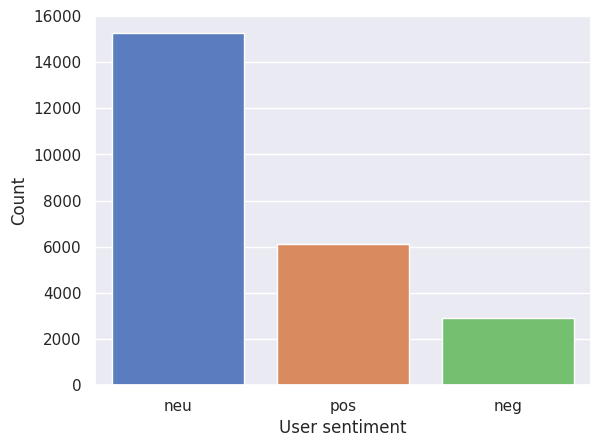

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the theme style to "darkgrid"
sns.set_theme(style="darkgrid")
sns.set_palette("muted")

# Create the barplot using seaborn's `barplot()` function
ax = sns.barplot(x="index", y="User_sentiment", data=df1)

# Set the title and axis labels
# ax.set_title("Sentiment distribution")
ax.set_xlabel("User sentiment")
ax.set_ylabel("Count")

# Display the plot
plt.show()


In [ ]:
with open('CLB/turn_lengths.txt') as f:
    lines = f.readlines()

l = lines[0].split(", ")
l[0] = l[0].split("[")[1]
l[-1] = l[-1].split("]")[0]

d = pd.Series(l).value_counts()
ld = d.index
ld = [int(i)+1 for i in ld]
data = pd.DataFrame({'indices': ld, 'value': list(d.values)})
data = data.sort_values(by='indices')

In [ ]:
data

indices  value
8         1     56
4         2    393
2         3   1026
0         4   1403
1         5   1239
3         6    731
5         7    320
6         8    136
7         9     57
9        10     21
10       11      3
13       13      1
12       14      1
11       22      1

In [ ]:
sum(data['value'])

5388

In [ ]:
l = [data['value'][i]* data['indices'][i] for i in range(len(data))]
sum(l)/sum(data['value'])

4.5

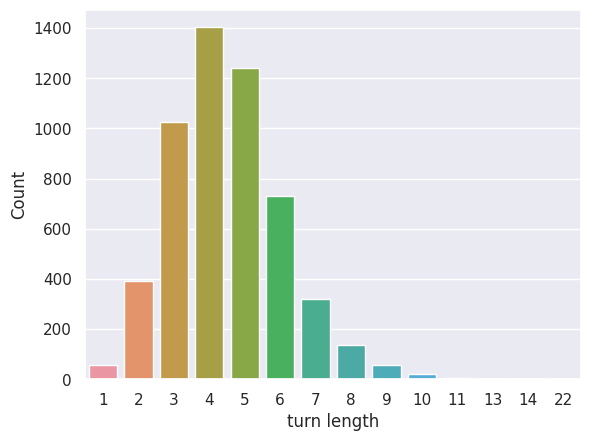

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the theme style to "darkgrid"
sns.set_theme(style="darkgrid")
sns.set_palette("muted")

# Create the barplot using seaborn's `barplot()` function
ax = sns.barplot(x="indices", y="value", data=data)

# Set the title and axis labels
# ax.set_title("Sentiment distribution")
ax.set_xlabel("turn length")
ax.set_ylabel("Count")

# Display the plot
plt.show()


Text(0.5, 0.98, 'Turn length distribution of CraigListBargain dataset')

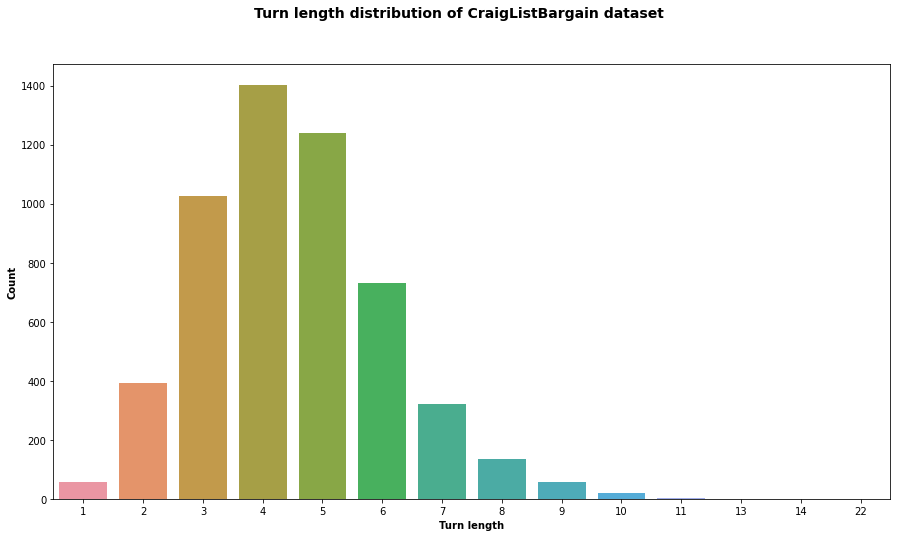

In [ ]:
fig, ax = plt.subplots(figsize = ( 15 , 8 ))
sns.barplot(ax=ax, x=data.indices, y=data.value)
ax.set_xlabel('Turn length', fontweight ='bold')
ax.set_ylabel('Count', fontweight ='bold')
fig.suptitle('Turn length distribution of CraigListBargain dataset',
             fontsize = 14, fontweight ='bold')

## Training :::

In [ ]:
!pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.0/7.0 MB 69.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.5/224.5 kB 29.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 92.9 MB/s eta 0:00:00


In [ ]:
!pip install -U nltk

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import nltk
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('punkt')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
!pip install rouge_score

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for rouge_score: filename=rouge_score-0.1.2-py3-none-any.whl size=24954 sha256=445a54b599e4d8f2a9cff6b7af44d28e9851d85a5d767ad09e651c6486076c56
  Stored in directory: /root/.cache/pip/wheels/5f/dd/89/461065a73be61a532ff8599a28e9beef17985c9e9c31e541b4
Successfully built rouge_score


In [ ]:
!python3 train_exp.py -mode train -cfg lr=1e-4 warmup_steps=2000 gradient_accumulation_steps=16 batch_size=2 epoch_num=15 exp_no=best_model

Streaming output truncated to the last 5000 lines.
loss:  tensor(0.5027, device='cuda:0', grad_fn=<DivBackward0>)
----------------------------------------
----------------------------------------
EPOCH:14, epoch step:1372
input shape:  torch.Size([2, 497])
context:  <sos_u> hi i m very interested in the masi v cccp <eos_u> <sos_s> neu <eos_s> <sos_b> <eos_b> <sos_ns> [seller_pos_sentiment] [-3671] [1608] [-5793] [5387] [7374] [first_person_singular_count_seller] [-3672] [1607] [-5802] [5395] [7385] [third_person_singular_seller] [-3673] [1610] [-5781] [5380] [7361] [number_of_diff_dic_pos] [-3666] [1604] [-5774] [5370] [7353] [personal_concern_seller] [-3668] [1606] [-5797] [5388] [7377] [liwc_informal] [-3680] [1619] [-5798] [5396] [7379] <eos_ns> <sos_a> [common] [unknown] <eos_a> <sos_r> oh great. i m looking to get rid of it quickly. need the cash asap <eos_r> <sos_u> awesome! i ll give you <price>_-0.2 for it and i ll come get it myself <eos_u> <sos_s> neu <eos_s> <sos_b> [common]

## Evaluation :::

### True bspn, True aspn -->

In [ ]:
path = 'experiments/all_best_model_sd11_lr0.0001_bs2_ga16/epoch31_trloss0.53_gpt2'
!python3 train.py -mode test -cfg eval_load_path=$path use_true_prev_bspn=True use_true_prev_aspn=True use_true_prev_resp=True use_true_curr_bspn=True use_true_curr_aspn=True use_all_previous_context=True cuda_device=0

Streaming output truncated to the last 5000 lines.
hyps: [['[value_price_ratio]?']]
ref: [['[value_price_ratio]?']]
INFO:absl:Using default tokenizer.
hyp: ['[value_price_ratio]?']
hyps: [['deal']]
ref: [['deal!']]
INFO:absl:Using default tokenizer.
hyp: ['deal']
hyps: [['hello']]
ref: [['hello']]
INFO:absl:Using default tokenizer.
hyp: ['hello']
hyps: [['the', 'paint', 'is', 'great!', 'no', 'scratches']]
ref: [['paint', 'is', 'great', 'not', 'a', 'single', 'scratch', 'or', 'ding.']]
INFO:absl:Using default tokenizer.
hyp: ['the', 'paint', 'is', 'great!', 'no', 'scratches']
hello: <zip object at 0x7f19f2d46cd0>
hello: <zip object at 0x7f19f2d46050>
hello: <zip object at 0x7f19f2d46050>
hello: <zip object at 0x7f19f2d46cd0>
hyps: [['i', 'think', '[value_price_ratio]', 'is', 'a', 'fair', 'price.', 'it', 'is', 'a', 'great', 'truck', 'and', 'has', 'a', 'lot', 'of', 'after', 'market', 'parts.']]
ref: [['i', 'm', 'not', 'sure', 'what', 'you', 'mean.', 'the', 'price', 'it', 'is', 'listed', 'a

### Generated bspn, Generated aspn -->

In [ ]:
path = 'experiments/all_best_model_sd11_lr0.0001_bs2_ga16/minimum_loss_model_GAT_5_emb_n_strategy'
!python3 train_exp.py -mode test -cfg eval_load_path=$path use_true_prev_bspn=False use_true_prev_aspn=False use_true_prev_resp=False use_true_curr_bspn=False use_true_curr_aspn=False use_all_previous_context=False cuda_device=0

2023-05-02 11:39:30.330015: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
./CLB/clb-processed/vocab
vocab file loaded from "./CLB/clb-processed/vocab"
Vocabulary size including oov: 10910
INFO:root:Reading encoded data from ./CLB/clb-processed/new_db_se_blank_encoded.data.json
INFO:root:train size:4468, dev size:744, test size:746
INFO:root:Generate setting: 
	 use true_prev_bspn=False 
	 use true_prev_aspn=False 
	 use true_prev_resp=False 
	 use true_curr_bspn=False 
	 use true_curr_aspn=False 
	 use_all_previous_context=False
INFO:root:***** Running Evaluation *****
INFO:root:  Num Turns = 3496
dialog: 0
turn: <sos_u> hi there! how are you today? <eos_u>
generated belief state: <sos_b> <eos_b>
generated negotiation strategy:  [seller_pos_sentiment] [-3671] [1608] [-5793] [5387] [7374] [first_person_singular_count_seller] [-3672] [1607] [-5802] [5395] [7385] [number_of_diff_dic_pos] [-3666] [1604] [-5774] [5370] [7353] [number_of_diff

### Generated bspn, True act -->

In [ ]:
path = 'experiments/all_best_model_sd11_lr0.0001_bs2_ga16/best_model_gpt2'
!python3 train.py -mode test -cfg eval_load_path=$path use_true_prev_bspn=True use_true_prev_aspn=True use_true_prev_resp=False use_true_curr_bspn=False use_true_curr_aspn=True use_all_previous_context=True cuda_device=0

Streaming output truncated to the last 5000 lines.
turn: <sos_u> i m interested in the iphone case you posted for sale. <eos_u>
generated belief state: <sos_b> <eos_b>
generated negotiation strategy:  ns> [seller_pos_sentiment] [first_person_singular_count_seller] [third_person_singular_seller] [number_of_diff_dic_pos] [number_of_diff_dic_neg] [personal_concern_seller] <eos_ns> <sos_a> [common] [unknown] <eos_a> <sos_r> yes i am. it is in
final_context:  <sos_u> <eos_u> <sos_b> <eos_b> <sos_ns> [number_of_diff_dic_pos] [politeness_seller_greet] <eos_ns> <sos_a> [common] [intro] <eos_a> <sos_a> [common] [intro] <eos_a> <sos_r> hello are you interested in the bike? <eos_r> <sos_u> i m interested in the iphone case you posted for sale. <eos_u> <sos_b> <eos_b> <sos_ns> [seller_pos_sentiment] [number_of_diff_dic_pos] [assertive_count_seller] <eos_ns> <sos_a>
generated ar: <sos_a> [common] [unknown] <eos_a> <sos_r> sure! sure! <eos_r>
---------------------------------------------------------

### True bspn, Generated act -->

In [ ]:
path = 'experiments/all_best_model_sd11_lr0.0001_bs2_ga16/best_model_gpt2'
!python3 train.py -mode test -cfg eval_load_path=$path use_true_prev_bspn=True use_true_prev_aspn=True use_true_prev_resp=False use_true_curr_bspn=True use_true_curr_aspn=False use_all_previous_context=True cuda_device=0

Streaming output truncated to the last 5000 lines.
hyps: [['yes', 'it', 'is!', 'i', 'am', 'selling', 'it', 'for', 'a', 'great', 'price.']]
ref: [['yes', 'it', 'is', 'it', 'really', 'is', 'a', 'great', 'location.', 'i', 'recently', 'landscaped', 'the', 'yard', 'to', 'make', 'this', 'an', 'oasis.']]
INFO:absl:Using default tokenizer.
hyp: ['yes', 'it', 'is!', 'i', 'am', 'selling', 'it', 'for', 'a', 'great', 'price.']
hello: <zip object at 0x7f3eb2f43d70>
hello: <zip object at 0x7f3eb2f49910>
hello: <zip object at 0x7f3eb2f49910>
hello: <zip object at 0x7f3eb2f49910>
hyps: [['it', 'is', 'a', 'very', 'large', '1', 'and', 'it', 'is', 'very', 'spacious.']]
ref: [['it', 'is', 'a', 'square', 'foot', '2', 'bedroom', 'home', 'with', 'an', 'updated', 'kitchen', 'and', 'living', 'room.', 'the', 'kitchen', 'has', 'a', 'great', 'backsplash', 'and', 'new', 'granite']]
INFO:absl:Using default tokenizer.
hyp: ['it', 'is', 'a', 'very', 'large', '1', 'and', 'it', 'is', 'very', 'spacious.']
hello: <zip ob

### Evaluation of dialogue act and negotiation strategy :::

In [ ]:
# n_strategy_track = pd.read_csv("n_strategy_track.csv").iloc[:,1:]
action_track = pd.read_csv("action_track.csv").iloc[:,1:]

In [ ]:
def precision_recall_f1(self, hyps, ref):
        lh = len(hyps[0])
        lr = len(ref[0])
        if len(hyps[0]) < len(ref[0]):
          for i in range(len(ref[0])-len(hyps[0])):
            hyps[0].append("<none>")

        elif len(hyps[0]) > len(ref[0]):
          hyps[0] = hyps[0][:len(ref[0])]

        if lr > 0:
            rec = len(set(hyps[0]).intersection(ref[0]))/lr
        else :
            rec = 0

        if lh > 0:    
            prc = len(set(hyps[0]).intersection(ref[0]))/lh
        else:
            prc = 0

        if (prc + rec) > 0:
            f1 = 2 * ((prc * rec)/(prc + rec))
        else :
            f1 = 0    

        return prc,rec,f1

## Chat :::

In [ ]:
path='experiments/all_best_model_sd11_lr0.0001_bs2_ga16/minimum_loss_model_GAT_5_emb_n_strategy'
!python chat.py -mode test -cfg eval_load_path=$path use_true_prev_bspn=False use_true_prev_aspn=False use_true_db_pointer=False use_true_prev_resp=False use_true_curr_bspn=False use_true_curr_aspn=False use_all_previous_context=True cuda_device=0

2022-12-03 18:09:24.390504: E tensorflow/stream_executor/cuda/cuda_driver.cc:271] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
./CLB/clb-processed/vocab
vocab file loaded from "./CLB/clb-processed/vocab"
Vocabulary size including oov: 10898
INFO:root:Reading encoded data from ./CLB/clb-processed/new_db_se_blank_encoded.data.json
INFO:root:train size:4466, dev size:744, test size:746
INFO:root:Generate setting: 
	 use true_prev_bspn=False 
	 use true_prev_aspn=False 
	 use true_db_pointer=False 
	 use true_prev_resp=False 
	 use true_curr_bspn=False 
	 use true_curr_aspn=False 
	 use_all_previous_context=True
starting chatbot...
turn:
hi how are you?
generated belief state: <sos_b> <eos_b>
generated negotiation strategy:  <sos_ns>  [seller_pos_sentiment] [first_person_singular_count_seller] [number_of_diff_dic_pos] [number_of_diff_dic_neg] [politeness_seller_gratitude] [politeness_seller_greet]  <eos_ns>
final_context:  hi how are you? <sos_b> <eos_b> 

In [ ]:
path='experiments/all_best_model_sd11_lr0.0001_bs2_ga16/minimum_loss_model_GAT_5_emb_n_strategy'
!python chat_exp.py -mode test -cfg eval_load_path=$path use_true_prev_bspn=False use_true_prev_aspn=False use_true_db_pointer=False use_true_prev_resp=False use_true_curr_bspn=False use_true_curr_aspn=False use_all_previous_context=True cuda_device=0

2023-05-08 03:19:19.375261: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
./CLB/clb-processed/vocab
vocab file loaded from "./CLB/clb-processed/vocab"
Vocabulary size including oov: 10910
INFO:root:Reading encoded data from ./CLB/clb-processed/new_db_se_blank_encoded.data.json
INFO:root:train size:4468, dev size:744, test size:746
INFO:root:Generate setting: 
	 use true_prev_bspn=False 
	 use true_prev_aspn=False 
	 use true_db_pointer=False 
	 use true_prev_resp=False 
	 use true_curr_bspn=False 
	 use true_curr_aspn=False 
	 use_all_previous_context=True
starting chatbot...
turn: Hi I am interested in your bike.
generated sentiment: neu
generated belief state: <sos_b> <eos_b>
generated negotiation strategy:  ['[seller_pos_sentiment]', '[-3671]', '[1608]', '[-5793]', '[5387]', '[7374]', '[first_person_singular_count_seller]', '[-3672]', '[1607]', '[-5802]', '[5395]', '[7385]', '[third_person_singular_seller]', '[-3673]', '[1610]', '[-5

In [ ]:
<sos_u> Hi I am interested in your bike <eos_u> <sos_s> neu <eos_s> <sos_b> <eos_b> [seller_pos_sentiment] [-3671] [1608] [-5793] [5387] [7374] [first_person_singular_count_seller] [-3672] [1607] [-5802] [5395] [7385] [third_person_singular_seller] [-3673] [1610] [-5781] [5380] [7361] [number_of_diff_dic_pos] [-3666] [1604] [-5774] [5370] [7353] [number_of_diff_dic_neg] [-3688] [1633] [-5776] [5376] [7355] [personal_concern_seller] [-3668] [1606] [-5797] [5388] [7377] <sos_a> [common] [init_price] Price_ratio <eos_a> <sos_r> great! i am asking <price>_1.0 for it. it is in great condition and has been well maintained. <eos_r> <sos_u> Have you used it at all? <eos_u> <sos_s> neu <eos_s> <sos_b> <eos_b> [seller_pos_sentiment] [-3671] [1608] [-5793] [5387] [7374] [first_person_singular_count_seller] [-3672] [1607] [-5802] [5395] [7385] [third_person_singular_seller] [-3673] [1610] [-5781] [5380] [7361] [number_of_diff_dic_pos] [-3666] [1604] [-5774] [5370] [7353] [number_of_diff_dic_neg] [-3688] [1633] [-5776] [5376] [7355] [personal_concern_seller] [-3668] [1606] [-5797] [5388] [7377] <sos_a> [common] [inform] <eos_a> <sos_r> i have had it for a few years and it is in great condition. <eos_r> <sos_u> But the price is a bit high for me. <eos_u> <sos_s> neu <eos_s> <sos_b> <eos_b> <sos_ns> [seller_pos_sentiment] [-3671] [1608] [-5793] [5387] [7374] [first_person_singular_count_seller] [-3672] [1607] [-5802] [5395] [7385] [third_person_singular_seller] [-3673] [1610] [-5781] [5380] [7361] [number_of_diff_dic_pos] [-3666] [1604] [-5774] [5370] [7353] [number_of_diff_dic_neg] [-3688] [1633] [-5776] [5376] [7355] [seller_propose] [-3680] [1617] [-5799] [5395] [7382] [hedge_count_seller] [-3685] [1624] [-5776] [5377] [7357] [who_propose] [-3670] [1605] [-5796] [5389] [7378] [personal_concern_seller] [-3668] [1606] [-5797] [5388] [7377] <eos_ns> <sos_a>


In [ ]:
hey I want to buy your car
Hi I am interested in your bike